1. Take iris flowers data set and reduced the 4D into 1D using PCA.Then train your model and predict a new flower with given measurements.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
x = pd.DataFrame(iris.data,columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
y = iris.target # here y is 1D array 0- setosa,1-versicolor,2-virginica
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Reducing Dimensionality from 4D to 1D

- iris flowers dataset contains 4 rows.That means the dimensionality of the data is 4.

# STEP 1 - Normalized the data

#### Using Standard Scaler

- mean = 0 and standard diviation = 1

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
pd.DataFrame(x_scaled)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# STEP 2 - Creating Covariance Matrix

In [14]:
rows = x_scaled.T # transpose the x_scaled data
covariance_matrix = np.cov(rows)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# STEP 3 - Creating Eigen Vector

In [15]:
eig_vals,eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


- We can calculate the fractions of each eigen value compared to the sum of all values.This gives an idea of percentage of each value,

In [16]:
# Find the highest eigen values
for i in range(len(eig_vals)):
    print('Eigenvalue {}: {}'.format(i+1, eig_vals[i]/sum(eig_vals)))

Eigenvalue 1: 0.7296244541329989
Eigenvalue 2: 0.22850761786701754
Eigenvalue 3: 0.03668921889282865
Eigenvalue 4: 0.005178709107154905


# STEP 4 - Extract only the Eigen value that is maximum and corresponding Eigen Vector

- So maximum Eigen value is found in the 0th row.This indicates 0th column in the Eigen Vectors.

In [17]:
eig_vecs.T # Columns become rows.0th Column becomes 0th Row
eig_vecs.T[0] # take 0th Row as Eigen Vector

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

# STEP 5 - Project the data on to that Eigen Vector

In [18]:
projected_x = x_scaled.dot(eig_vecs.T[0])

In [19]:
projected_x

array([-2.26470281, -2.08096115, -2.36422905, -2.29938422, -2.38984217,
       -2.07563095, -2.44402884, -2.23284716, -2.33464048, -2.18432817,
       -2.1663101 , -2.32613087, -2.2184509 , -2.6331007 , -2.1987406 ,
       -2.26221453, -2.2075877 , -2.19034951, -1.898572  , -2.34336905,
       -1.914323  , -2.20701284, -2.7743447 , -1.81866953, -2.22716331,
       -1.95184633, -2.05115137, -2.16857717, -2.13956345, -2.26526149,
       -2.14012214, -1.83159477, -2.61494794, -2.44617739, -2.10997488,
       -2.2078089 , -2.04514621, -2.52733191, -2.42963258, -2.16971071,
       -2.28647514, -1.85812246, -2.5536384 , -1.96444768, -2.13705901,
       -2.0697443 , -2.38473317, -2.39437631, -2.22944655, -2.20383344,
        1.10178118,  0.73133743,  1.24097932,  0.40748306,  1.0754747 ,
        0.38868734,  0.74652974, -0.48732274,  0.92790164,  0.01142619,
       -0.11019628,  0.44069345,  0.56210831,  0.71956189, -0.0333547 ,
        0.87540719,  0.35025167,  0.15881005,  1.22509363,  0.16

In [20]:
df = pd.DataFrame(projected_x,columns=['PC1'])
df

,PC1
0,-2.264703
1,-2.080961
2,-2.364229
3,-2.299384
4,-2.389842
...,...
145,1.870503
146,1.564580
147,1.521170
148,1.372788


In [21]:
df['y-axis'] = 0.0
df['target'] = y

In [22]:
df

,PC1,y-axis,target
0,-2.264703,0.0,0
1,-2.080961,0.0,0
2,-2.364229,0.0,0
3,-2.299384,0.0,0
4,-2.389842,0.0,0
...,...,...,...
145,1.870503,0.0,2
146,1.564580,0.0,2
147,1.521170,0.0,2
148,1.372788,0.0,2


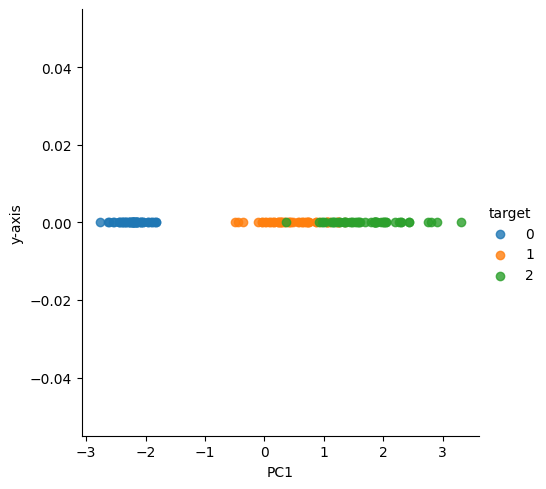

In [23]:
import seaborn as sns 
sns.lmplot(data=df,x='PC1',y='y-axis',fit_reg=False,hue='target')

# Using PCA 

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=1) # reduce dimensionality to 1

In [26]:
projected_x = pca.fit_transform(x_scaled)

In [27]:
projected_x

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217],
       [-2.07563095],
       [-2.44402884],
       [-2.23284716],
       [-2.33464048],
       [-2.18432817],
       [-2.1663101 ],
       [-2.32613087],
       [-2.2184509 ],
       [-2.6331007 ],
       [-2.1987406 ],
       [-2.26221453],
       [-2.2075877 ],
       [-2.19034951],
       [-1.898572  ],
       [-2.34336905],
       [-1.914323  ],
       [-2.20701284],
       [-2.7743447 ],
       [-1.81866953],
       [-2.22716331],
       [-1.95184633],
       [-2.05115137],
       [-2.16857717],
       [-2.13956345],
       [-2.26526149],
       [-2.14012214],
       [-1.83159477],
       [-2.61494794],
       [-2.44617739],
       [-2.10997488],
       [-2.2078089 ],
       [-2.04514621],
       [-2.52733191],
       [-2.42963258],
       [-2.16971071],
       [-2.28647514],
       [-1.85812246],
       [-2.5536384 ],
       [-1.96444768],
       [-2.13705901],
       [-2

In [28]:
df1 = pd.DataFrame(projected_x,columns=['PC1'])
df1['y-axis'] = 0.0
df1['target'] = y

In [29]:
df1

,PC1,y-axis,target
0,-2.264703,0.0,0
1,-2.080961,0.0,0
2,-2.364229,0.0,0
3,-2.299384,0.0,0
4,-2.389842,0.0,0
...,...,...,...
145,1.870503,0.0,2
146,1.564580,0.0,2
147,1.521170,0.0,2
148,1.372788,0.0,2


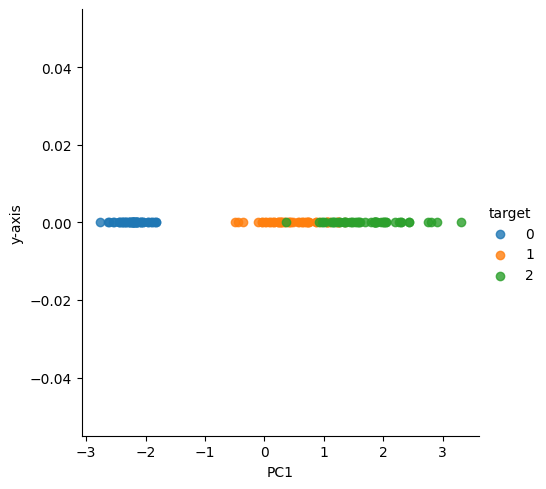

In [30]:
sns.lmplot(data=df1,x='PC1',y='y-axis',fit_reg=False,hue='target')

In [31]:
x_scaled.shape

(150, 4)

In [32]:
projected_x.shape

(150, 1)

# Using Machine Learning Model

#### If we want to classify a given flower into one of the 3 given flowers.
- In this case, a classification model like SVM,Naive Bayes or Decision Tree

In [33]:
data = projected_x.reshape(-1,1) # converted into 2D array 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [35]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=42)

In [36]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [40]:
pca.explained_variance_

array([2.93808505])

In [37]:
svc.score(x_test,y_test)

0.9

In [38]:
inputs = np.array([[6.6,3.0,4.4,1.4]])

In [39]:
scaled = scaler.transform(inputs)
pca_inputs = pca.transform(scaled)
svc.predict(pca_inputs)

array([1])